In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


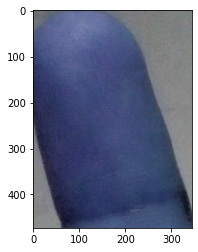

In [17]:
#load image
path = "/home/lattard/PROJECTS/DATA/fingertip/s3_app_data_bad_detections/Result_1595884474_3/Result_1595884474_3/Result_1595884474_3_211_detected_fingertips_0.jpg"
#path = "/home/lattard/PROJECTS/DATA/fingertip/skin/finger_1.jpg"

rgb_frame = cv2.imread(path)
plt.imshow(rgb_frame)

# Extract finger by skin colour

In [19]:
#skin color range boundaries of the HSV pixel
skin_col_low = np.array([0, 48, 80], dtype="uint8")
skin_col_high = np.array([20, 255, 255], dtype="uint8")


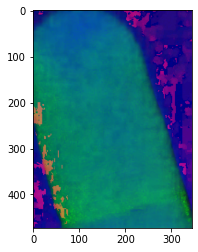

In [21]:
converted = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2HSV)
plt.imshow(converted)

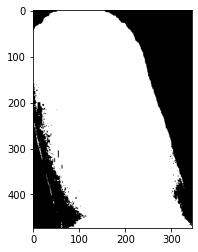

In [22]:
#filter the image to get the skin area
skin_mask = cv2.inRange(converted, skin_col_low, skin_col_high)
plt.imshow(skin_mask, cmap='gray')

# Extracting foreground

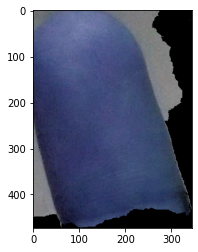

In [29]:
h, w = rgb_frame.shape[:2]

# ROI containing a segmented object. The pixels outside of the ROI are marked as obvious background.
# The parameter is only used when mode==GC_INIT_WITH_RECT
#roi = (x, y, half_square_dim*2, half_square_dim*2)
roi = (0,0, w-1, h-1)


mask = np.zeros(rgb_frame.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
(mask, bgModel, fgModel) = cv2.grabCut(rgb_frame, mask, roi, bgdModel, fgdModel, 1, cv2.GC_INIT_WITH_RECT)

# using the mask from grabcut to filter out the background
outputMask = np.where((mask==cv2.GC_BGD)|(mask==cv2.GC_PR_BGD),0,1).astype('uint8')
outputMask = (outputMask * 255).astype("uint8")
plt.imshow(outputMask, cmap='gray')
output = cv2.bitwise_and(rgb_frame, rgb_frame, mask=outputMask)
plt.imshow(output)